# Energy Eficiency Building - Wildan Aziz Hidayat

#### Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

/home/wildanaziz/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


#### Data Loading

In [2]:
path = "/home/wildanaziz/Energy-Eficiency-Building-Prediction/dataset/ENB2012_data.xlsx"
energy = pd.read_excel(path)
energy

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


#### Change Variable Names

To read data more easily

In [3]:
energy.rename(columns= {'X1':'Relative_Compactness',
                        'X2':'Surface_Area',
                        'X3':'Wall_Area',
                        'X4':'Roof_Area',
                        'X5':'Overall_Height',
                        'X6':'Orientation',
                        'X7':'Glazing_Area',
                        'X8':'Glazing_Area_Distribution',
                        'Y1': 'Heating Load',
                        'Y2': 'Cooling Load'}, inplace=True)

In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


#### Describe Datasets

In [5]:
energy.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


## Data Preparation

#### Checking Missing Value

In [6]:
check_0_variable = (energy == 0).sum()

check_0_variable

Relative_Compactness          0
Surface_Area                  0
Wall_Area                     0
Roof_Area                     0
Overall_Height                0
Orientation                   0
Glazing_Area                 48
Glazing_Area_Distribution    48
Heating Load                  0
Cooling Load                  0
dtype: int64

#### Remove Missing Value

In [7]:
energy = energy.loc[(energy[['Glazing_Area', 'Glazing_Area_Distribution']] != 0).all(axis=1)]

check_0_variable = (energy == 0).sum()

check_0_variable

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

#### Boxplot Visualization

<Axes: xlabel='Relative_Compactness'>

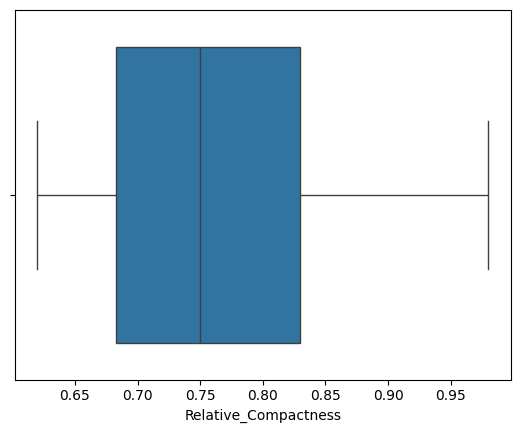

In [8]:
sns.boxplot(x=energy['Relative_Compactness'])

<Axes: xlabel='Surface_Area'>

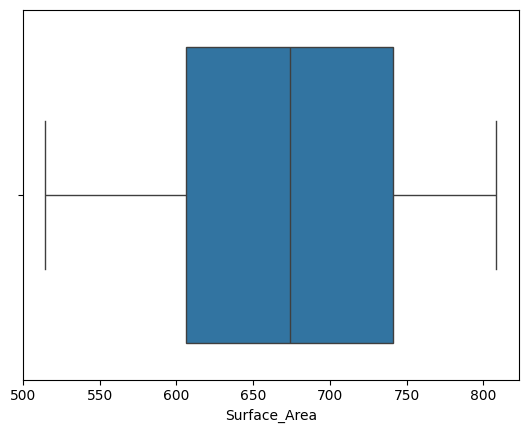

In [9]:
sns.boxplot(x=energy['Surface_Area'])

<Axes: xlabel='Wall_Area'>

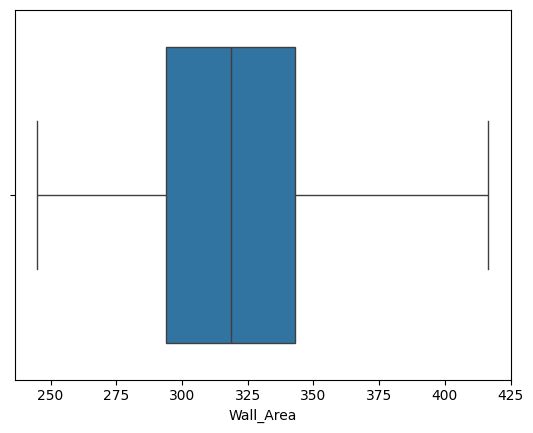

In [10]:
sns.boxplot(x=energy['Wall_Area'])

<Axes: xlabel='Roof_Area'>

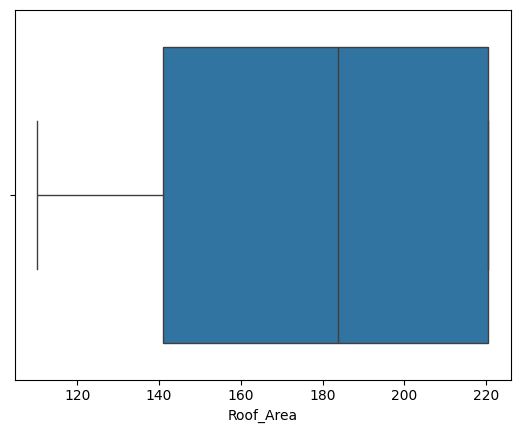

In [11]:
sns.boxplot(x=energy['Roof_Area'])

<Axes: xlabel='Overall_Height'>

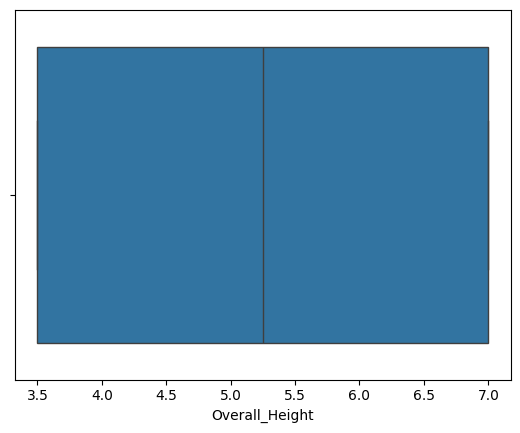

In [12]:
sns.boxplot(x=energy['Overall_Height'])

<Axes: xlabel='Orientation'>

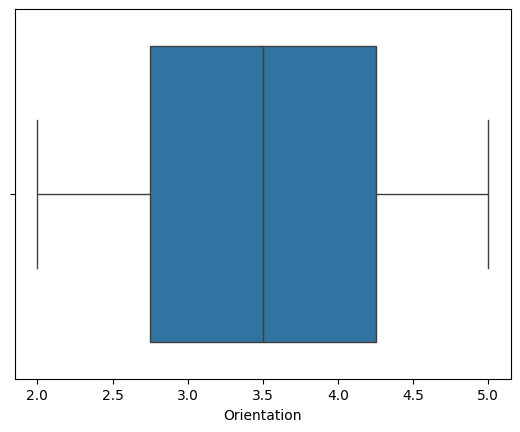

In [13]:
sns.boxplot(x=energy['Orientation'])

<Axes: xlabel='Glazing_Area'>

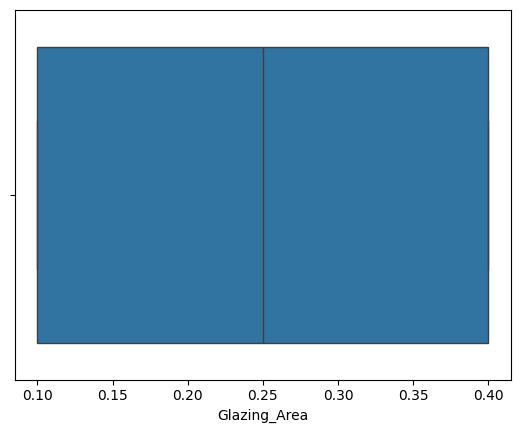

In [14]:
sns.boxplot(x=energy['Glazing_Area'])

<Axes: xlabel='Glazing_Area_Distribution'>

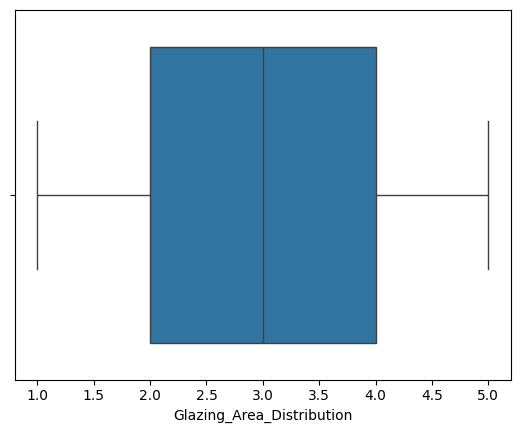

In [15]:
sns.boxplot(x=energy['Glazing_Area_Distribution'])

#### Handle Outliers

In [16]:
print(energy.dtypes)

numeric_energy = ['Relative_Compactness', 'Surface_Area', 'Wall_Area', 'Roof_Area', 'Overall_Height', 'Orientation', 'Glazing_Area', 'Glazing_Area_Distribution', 'Heating Load', 'Cooling Load']

energy[numeric_energy]

Relative_Compactness         float64
Surface_Area                 float64
Wall_Area                    float64
Roof_Area                    float64
Overall_Height               float64
Orientation                    int64
Glazing_Area                 float64
Glazing_Area_Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating Load,Cooling Load
48,0.98,514.5,294.0,110.25,7.0,2,0.1,1,24.58,26.47
49,0.98,514.5,294.0,110.25,7.0,3,0.1,1,24.63,26.37
50,0.98,514.5,294.0,110.25,7.0,4,0.1,1,24.63,26.44
51,0.98,514.5,294.0,110.25,7.0,5,0.1,1,24.59,26.29
52,0.90,563.5,318.5,122.50,7.0,2,0.1,1,29.03,32.92
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [17]:
Q1 = energy[numeric_energy].quantile(0.25)
Q3 = energy[numeric_energy].quantile(0.75)
IQR = Q3 - Q1
energy=energy[~((energy[numeric_energy] < (Q1 - 1.5 * IQR)) |(energy[numeric_energy] > (Q3 + 1.5 * IQR))).any(axis=1)]

energy.shape

(720, 10)

In [18]:
energy

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating Load,Cooling Load
48,0.98,514.5,294.0,110.25,7.0,2,0.1,1,24.58,26.47
49,0.98,514.5,294.0,110.25,7.0,3,0.1,1,24.63,26.37
50,0.98,514.5,294.0,110.25,7.0,4,0.1,1,24.63,26.44
51,0.98,514.5,294.0,110.25,7.0,5,0.1,1,24.59,26.29
52,0.90,563.5,318.5,122.50,7.0,2,0.1,1,29.03,32.92
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


### Exploratory Data Analysis Univariate Analysis

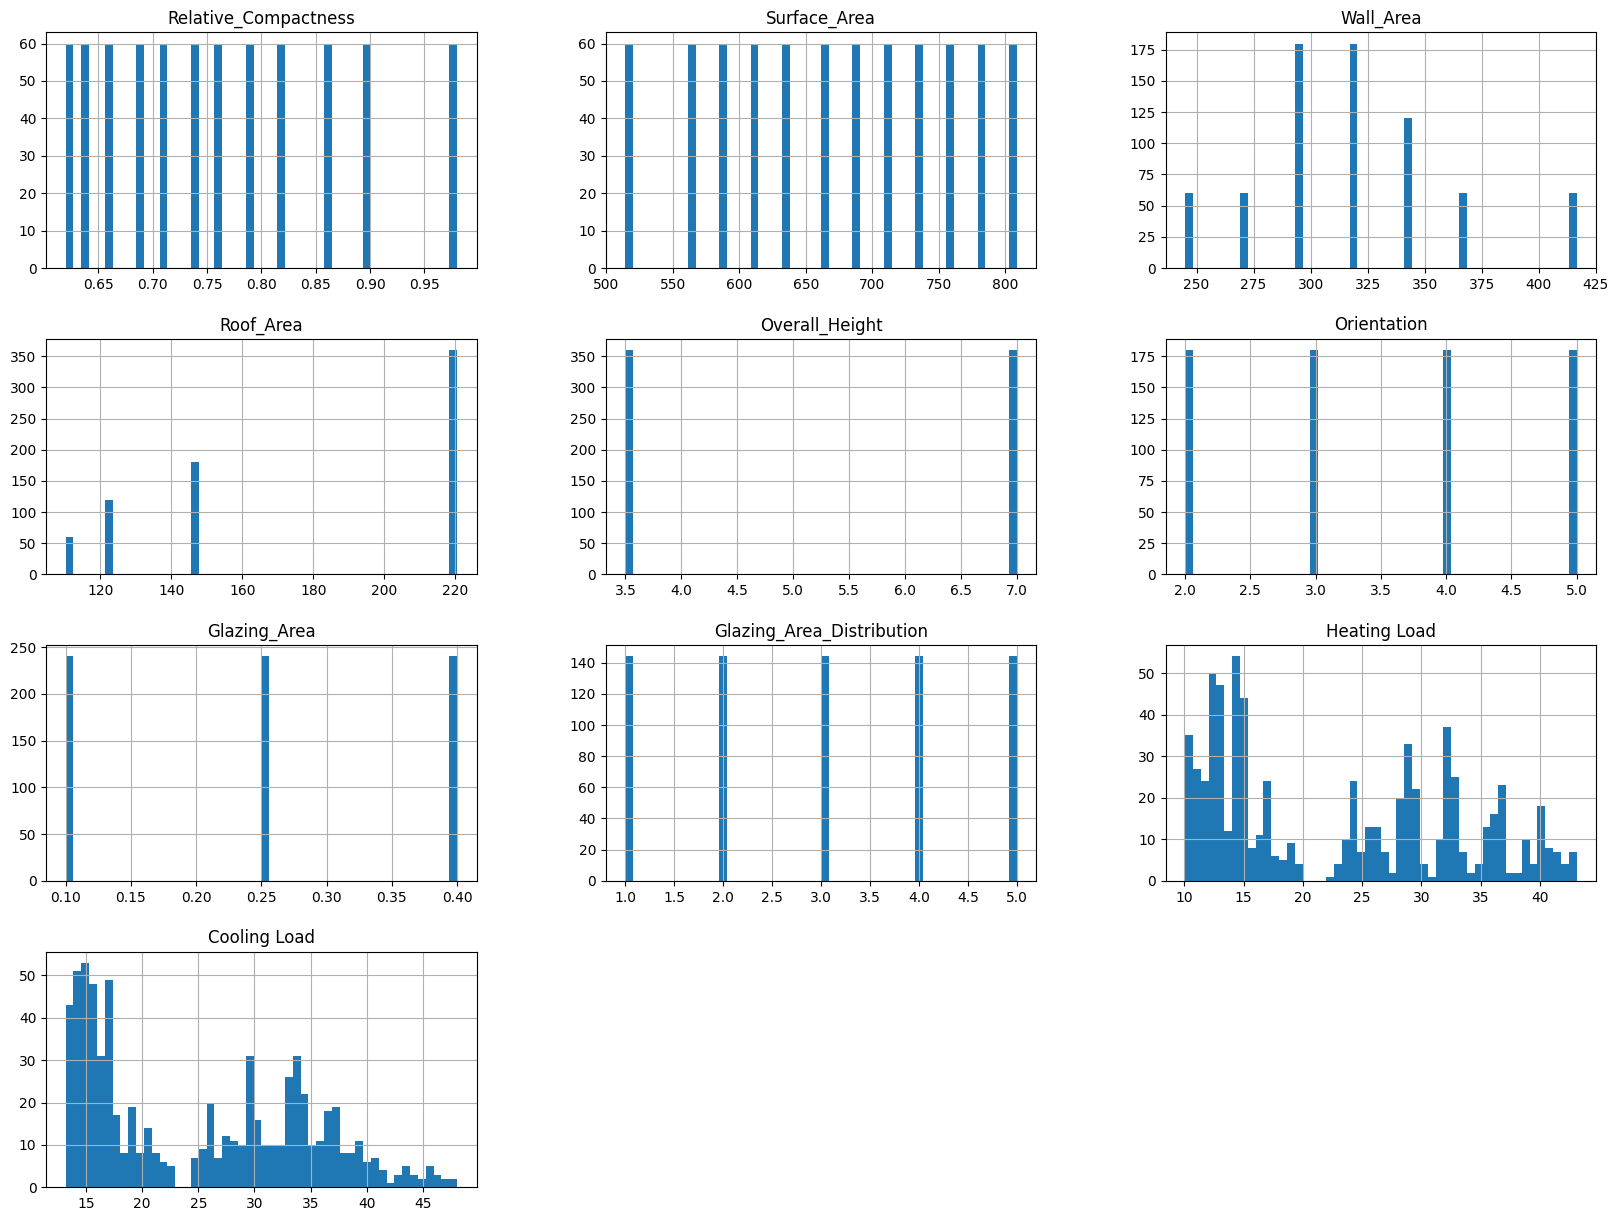

In [19]:
energy[numeric_energy].hist(bins=50, figsize=(20,15))
plt.show()

### Exploratory Data Analysis Mutivariate Analysis

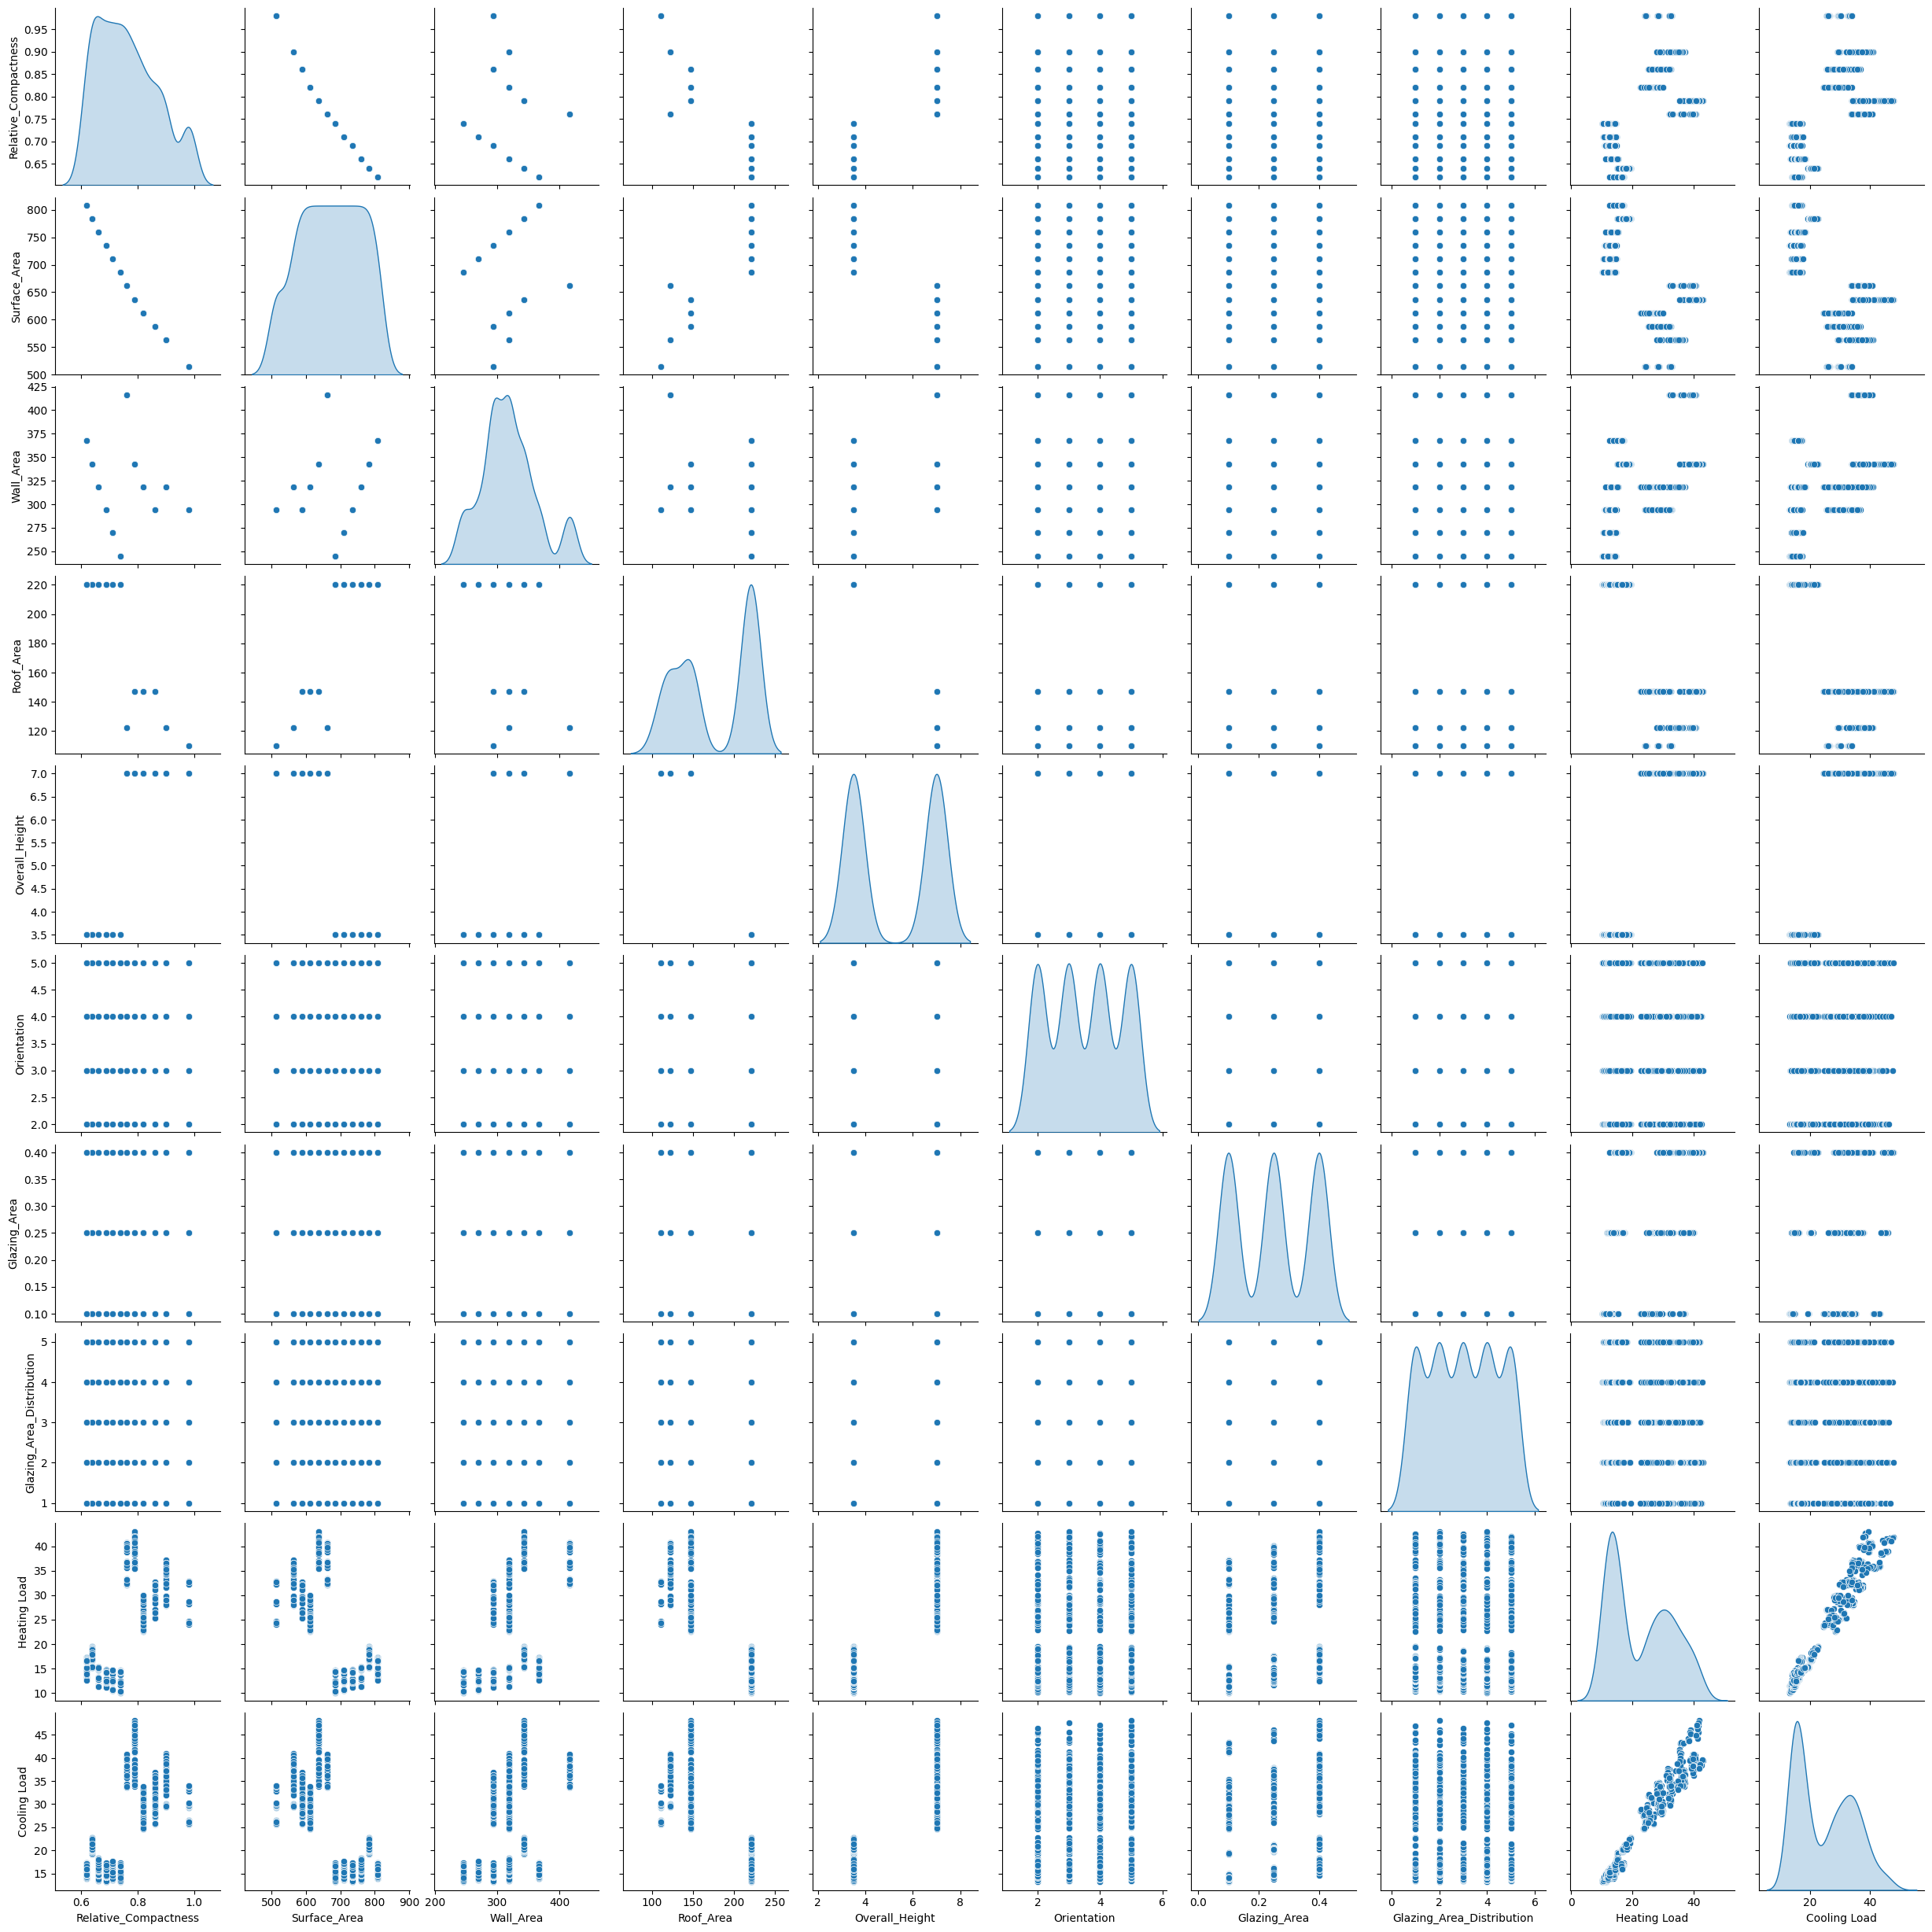

In [20]:
sns.pairplot(energy, diag_kind='kde')

Text(0.5, 1.0, 'Correlation Matrix of Energy Dataset')

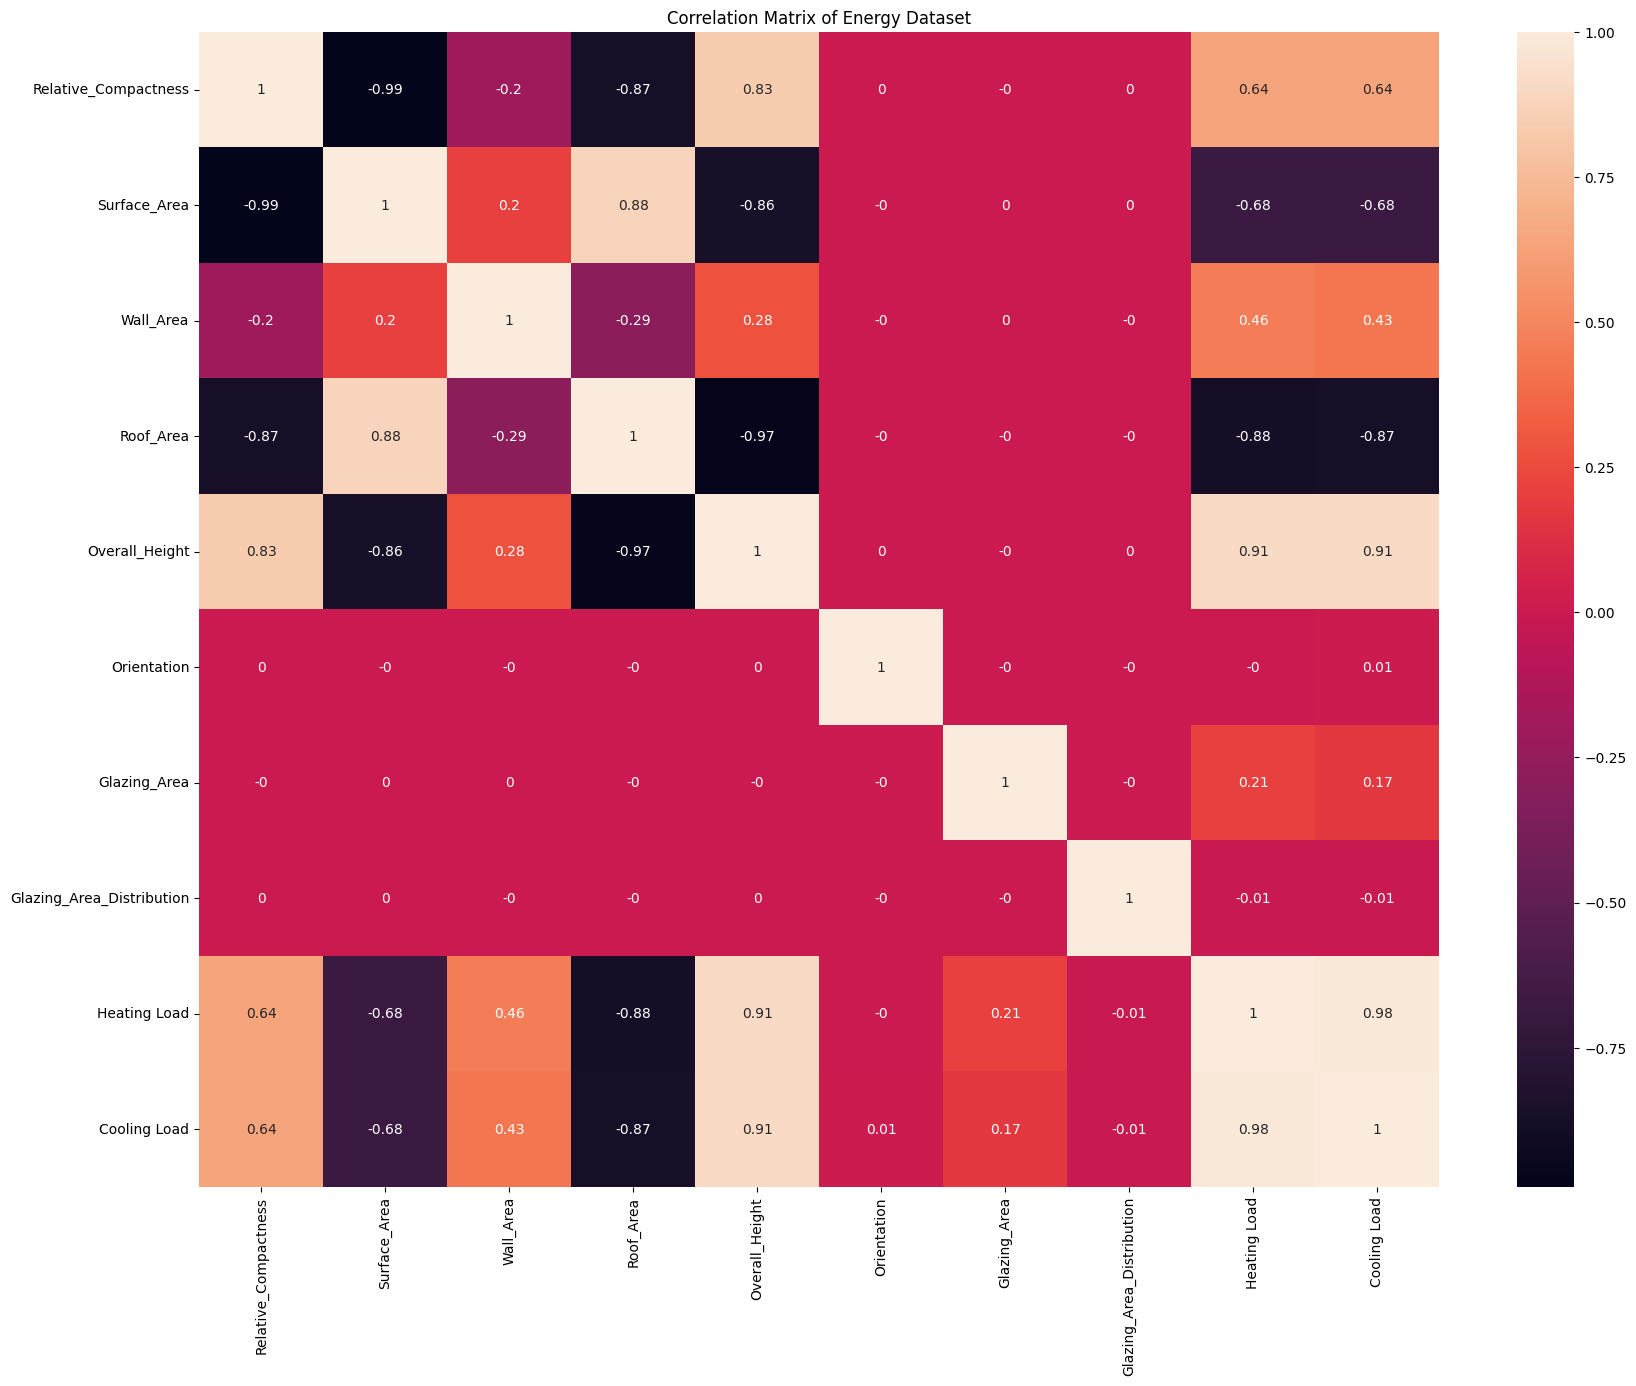

In [21]:
plt.figure(figsize=(20,15))

correlation_matrix = energy.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True)
plt.title("Correlation Matrix of Energy Dataset")

### Split into train and test

In [22]:
X = energy.drop(columns=['Heating Load', 'Cooling Load'], axis=1)
y = energy[['Heating Load', 'Cooling Load']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f"Total sample in datasets: {len(energy)}")
print(f"Total sample in train dataset: {len(X_train)}")
print(f"Total sample in test dataset: {len(X_test)}")

Total sample in datasets: 720
Total sample in train dataset: 576
Total sample in test dataset: 144


### Standardization

In [23]:
scaler = StandardScaler()

scaler.fit(X_train)

index, columns = X_train.index , X_train.columns

X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, index=index, columns=columns)
X_train.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
297,0.882677,-0.927072,-0.526577,-0.647905,0.986206,-0.406607,0.006421,-1.393015
351,0.503258,-0.647641,0.035105,-0.647905,0.986206,1.381222,0.006421,-0.687319
321,-0.729855,0.749517,-0.526577,0.985326,-1.013987,-0.406607,0.006421,-1.393015
568,-1.204129,1.308380,0.596787,0.985326,-1.013987,-1.300521,1.239244,-1.393015
699,-0.255581,0.190654,-1.649941,0.985326,-1.013987,1.381222,1.239244,0.724074


In [24]:
X_train.describe().round(4)

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
count,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000,576.0000
mean,0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
std,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009,1.0009
min,-1.3938,-1.7654,-1.6499,-1.4645,-1.0140,-1.3005,-1.2264,-1.3930
25%,-0.7299,-0.9271,-0.5266,-0.6479,-1.0140,-1.3005,-1.2264,-0.6873
50%,-0.0659,-0.0888,0.0351,-0.6479,0.9862,-0.4066,0.0064,0.0184
75%,0.8827,0.7495,0.5968,0.9853,0.9862,0.4873,1.2392,0.7241
max,2.0209,1.5878,2.2818,0.9853,0.9862,1.3812,1.2392,1.4298


### Modelling
- with KNN
- with Random Forest Regressor 
- with XGBoostRegressor 

In [25]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_pred=y_pred, y_true=y_true))

#### KNN

In [74]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)

result_knn = root_mean_squared_error(y_pred=knn.predict(X_train), y_true=y_train)
result_knn

1.9156878866583422

#### Looking for best parameter tuning RF

In [42]:
param_grid_rf = {
    'n_estimators': [10, 15, 20, 50, 100, 200, 500],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf_regressor = RandomForestRegressor()

rf_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    random_state=123
)

rf_search.fit(X_train, y_train)

print("Best parameters for Random Forest Regressor:\n", rf_search.best_params_)

Best parameters for Random Forest Regressor:
 {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7, 'bootstrap': False}


#### Combine best parameter tuning with my tuning

In [43]:
rfRegressor = RandomForestRegressor(n_estimators=1000, max_depth=6, min_samples_split=4, min_samples_leaf=4, max_features='sqrt', bootstrap=False, n_jobs=-1, random_state=123)
rfRegressor.fit(X_train, y_train)
result_rf = root_mean_squared_error(y_pred=rfRegressor.predict(X_train), y_true=y_train)
result_rf

1.2879574929706707

#### Looking for best parameter tuning XGB

In [ ]:
param_grid_xgb = {
    'n_estimators': [300, 400, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [1, 5, 10, 20],
    'reg_lambda': [1, 5, 10, 50],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

xgb = XGBRegressor(objective="reg:squarederror", random_state=123)

xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid_xgb,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_iter=50,
    verbose=1,
    n_jobs=-1,
    random_state=123
)

xgb_search.fit(X_train, y_train)

best_params = xgb_search.best_params_
print("Best parameters for XGBRegressor:", best_params)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBRegressor: {'subsample': 0.6, 'reg_lambda': 50, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


#### Combine best parameter tuning with my tuning

In [75]:
xgb = XGBRegressor(n_estimators=1000, eval_metric='rmse', max_depth=10, min_child_weight=1, learning_rate=0.01, reg_alpha=10, reg_lambda=10, subsample=0.7, colsample_bytree=1.0, random_state=123, n_jobs=-1)
xgb.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)
result_xgb = root_mean_squared_error(y_pred=xgb.predict(X_train), y_true=y_train)
result_xgb

0.8761743850875896

### Model Evaluation

In [46]:
test_index, test_columns = X_test.index , X_test.columns

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, index=test_index, columns=test_columns)
X_test.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
226,-0.729855,0.749517,-0.526577,0.985326,-1.013987,0.487307,-1.226402,0.724074
139,-1.204129,1.308380,0.596787,0.985326,-1.013987,1.381222,-1.226402,-0.687319
741,-0.065871,-0.088778,2.281834,-1.192315,0.986206,-0.406607,1.239244,1.429770
692,-0.065871,-0.088778,2.281834,-1.192315,0.986206,-1.300521,1.239244,0.724074
571,-1.204129,1.308380,0.596787,0.985326,-1.013987,1.381222,1.239244,-1.393015


#### Looking for train and test

In [76]:
all_model_result = pd.DataFrame(columns=['train_rmse', 'test_rmse'], index=['knn', 'rf', 'xgbr'])

model_dictionary = {
    'knn': knn,
    'rf': rfRegressor,
    'xgbr': xgb
}

for model_name, model in model_dictionary.items():
    
    all_model_result.loc[model_name]['train_rmse'] = root_mean_squared_error(y_pred=model.predict(X_train), y_true=y_train)
    all_model_result.loc[model_name]['test_rmse'] = root_mean_squared_error(y_pred=model.predict(X_test), y_true=y_test)
    
all_model_result

/tmp/ipykernel_7630/4016839556.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  all_model_result.loc[model_name]['train_rmse'] = root_mean_squared_error(y_pred=model.predict(X_train), y_true=y_train)
/tmp/ipykernel_7630/4016839556.py:12:

,train_rmse,test_rmse
knn,1.915688,2.169956
rf,1.287957,1.465254
xgbr,0.876174,0.988739


#### Plot train and test all models

<Axes: >

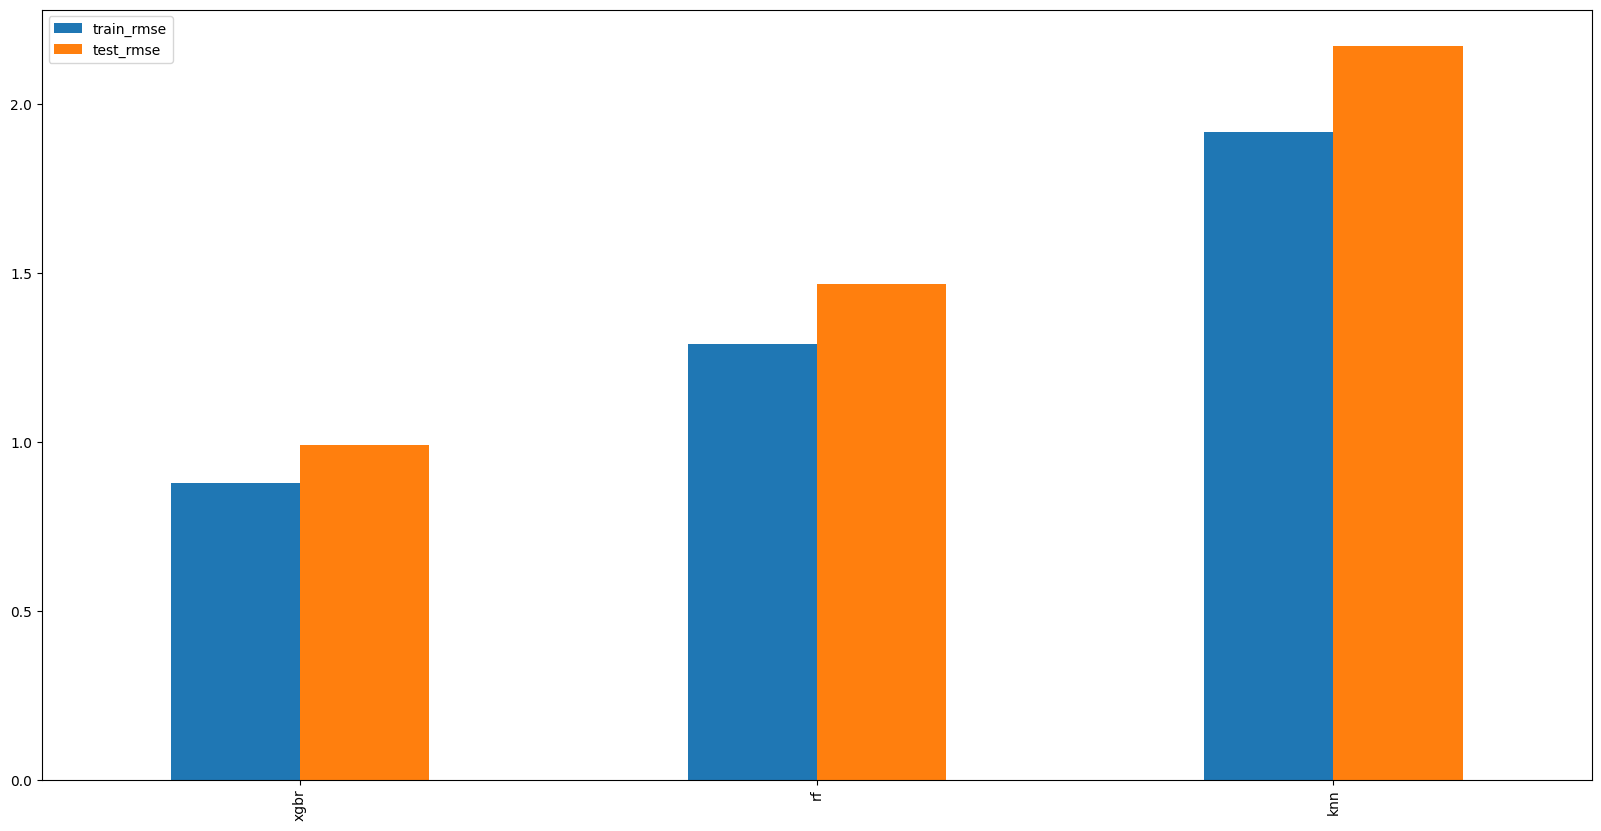

In [50]:
ax = plt.subplot()

all_model_result.sort_values('test_rmse').plot(kind='bar', figsize=(20,10), ax=ax)

#### Trying predicting using all models

In [ ]:
prediction = X_test.iloc[:10].copy()
pred_dict = {
    'Heating Load (true)': y_test['Heating Load'][:10].values,
    'Cooling Load (true)': y_test['Cooling Load'][:10].values
}

for name, model in model_dictionary.items():
    pred_heating, pred_cooling = model.predict(prediction).T  
    pred_dict[name + '_Heating Load (pred)'] = pred_heating.round(1)
    pred_dict[name + '_Cooling Load (pred)'] = pred_cooling.round(1)

pred_df = pd.DataFrame(pred_dict)
pred_df

,Heating Load (true),Cooling Load (true),knn_Heating Load (pred),knn_Cooling Load (pred),rf_Heating Load (pred),rf_Cooling Load (pred),xgbr_Heating Load (pred),xgbr_Cooling Load (pred)
0,11.07,14.42,10.9,14.4,12.0,15.0,11.200000,14.300000
1,15.19,19.30,13.3,16.1,16.0,19.6,14.900000,18.900000
2,39.72,39.80,39.9,39.6,38.3,38.1,39.700001,38.700001
3,40.68,40.36,39.5,39.1,38.5,38.2,39.799999,39.000000
4,19.42,22.53,17.2,19.0,18.3,21.3,19.100000,22.100000
5,34.24,37.26,35.7,35.8,33.5,34.6,35.099998,36.500000
6,36.86,37.28,36.3,37.2,37.4,37.6,36.900002,37.099998
7,28.67,29.43,28.6,29.7,29.1,30.5,28.600000,30.000000
8,12.77,16.22,14.3,17.5,12.7,15.7,13.200000,16.000000
9,36.13,37.58,36.9,37.1,37.4,37.5,36.900002,37.099998
